# Notebook 3 - Developing and Assessing Qualitative Structure Activity Relationship Machine Learnt Models

<strong>Author(s):</strong> Neil Berry, based on work from TeachOpenCADD (https://projects.volkamerlab.org/teachopencadd/talktorials.html) and Dr Sam Chong (https://github.com/drsamchong)

## Learning Objectives
- Molecular encoding
- Data labelling
- Prepare the data
- Create and train Classification Model - Multi-Layer Perceptron and Tensor Flow Neural Network
- Compare the performance between the models


### Machine learning (ML)

ML can be applied for (text adapted from [scikit-learn page](http://scikit-learn.org/stable/)):

* **Classification (supervised)**: Identify which category an object belongs to - see below
* Regression: Prediction of a continuous-values attribute associated with an object - see Workshop 2
* Clustering (unsupervised): Automated grouping of similar objects into sets - not covered in this course

## Theory

To successfully apply ML, we need a large data set of molecules, a molecular encoding, a label per molecule in the data set, and a ML algorithm to train a model. Then, we can make predictions for new molecules.

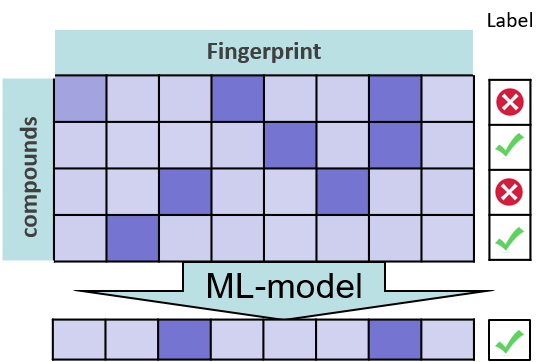

_Figure 1_: Machine learning overview: Molecular encoding, label, ML algorithm, prediction. Figure by Andrea Volkamer.

### Data preparation: Molecule encoding

For ML, molecules need to be converted into a list of features. Often molecular fingerprints are used as representation. These fingerprints implemented in RDKit (more info can be found in a  [presentation by G. Landrum](https://www.rdkit.org/UGM/2012/Landrum_RDKit_UGM.Fingerprints.Final.pptx.pdf)) are:

* **maccs**: 'MACCS keys are 166 bit structural key descriptors in which each bit is associated with a SMARTS pattern.' (see OpenEye's `MACCS` [docs](https://docs.eyesopen.com/toolkits/python/graphsimtk/fingerprint.html#maccs))

* **Morgan fingerprints** (and **ECFP**): 'Extended-Connectivity Fingerprints (ECFPs) are circular topological fingerprints designed for molecular characterization, similarity searching, and structure-activity modeling.' (see ChemAxon's `ECFP` [docs](https://docs.chemaxon.com/display/docs/Extended+Connectivity+Fingerprint+ECFP)) The original implementation of the ECFPs was done in Pipeline Pilot which is not open-source. Instead we use the implementation from RDKit which is called Morgan fingerprint. The two most important parameters of these fingerprints are the radius and fingerprint length. The first specifies the radius of circular neighborhoods considered for each atom. Here two radii are considered: 2 and 3. The length parameter specifies the length to which the bit string representation is hashed. The default length is 2048.

#### Supervised learning

A learning algorithm creates rules by finding patterns in the training data.

In a previous workshop we have looked at linear regression and random forest for supervised learning. We will now look at neural networks.

**Artificial neural networks (ANNs)**: Neural networks, also known as artificial neural networks (ANNs), are a subset of machine learning algorithms. The structure and the name of the neural network is inspired by the human brain, mimicking the way that biological neurons transfer signals to one another. Each connection, like the synapses in a biological brain, can transmit a signal from one artificial neuron to another. An artificial neuron that receives a signal can process it and then signal additional artificial neurons connected to it.

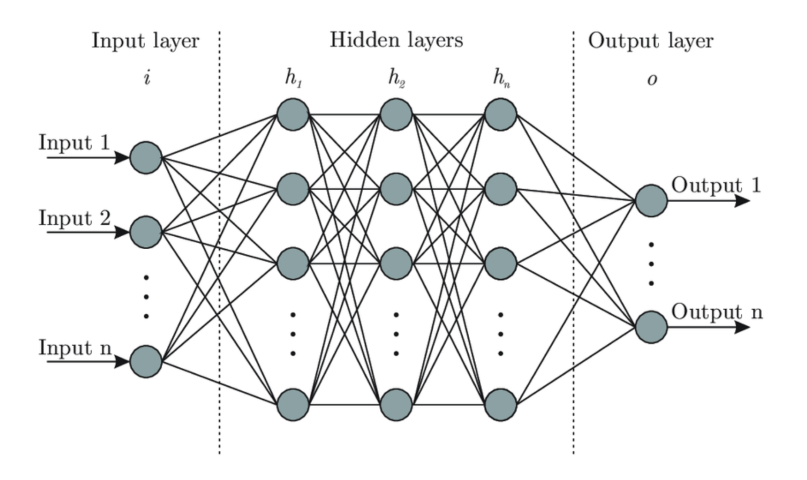

_Figure 2_: Example of a neural network with three hidden layers. 

ANNs consist of three main layers as shown in the figure above: the _input layer_, some _hidden layers_ and the _output layer_. Let's take a deeper look at each of them.

1. **Input neurons or input layer**
   - This layer represents the number of features which are used to make the predictions.
   - The input vector needs one input neuron per feature.
2. **Hidden layers and neurons per hidden layer**
    - The dimension of the hidden layers may vary greatly, but a good rule of thumb is to have dimensions in the range of the input layer and the output layer.
    - In general, using the same number of neurons for all hidden layers will suffice but for some datasets, having a large first layer and following it up with smaller layers may lead to a better performance as first layers can learn many low-level features.
3. **Output neurons or output layer**
    - The output layer represents the value of interest, which will be predicted by the neural network.
        - Regression task: the value is a real number (or vector) such as the pIC50 value.
        - Binary classification task: the output neuron represents the probability of belonging to the positive class.
        - Multi-class classification task: there is one output neuron per class and the predictions represent the probability of belonging to each class. A certain activation function is applied on the output layer to ensure the final probabilities sum up to 1.

**Neurons** are the core units of a neural network. Let's look into the operations done by each neuron to understand the overall mechanism of a neural network.

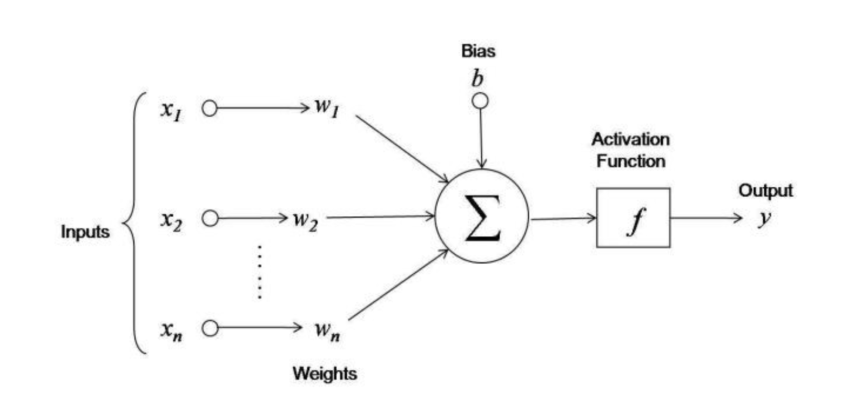

*Figure 2:* Operations done by a neuron. The figure is taken from the blogpost: "*First neural network for beginners explained (with code)*", Arthur Arnx, [towardsdatascience](https://towardsdatascience.com/first-neural-network-for-beginners-explained-with-code-4cfd37e06eaf).

Each input neuron $x_i$ is multiplied by a weight $w_i$. In Figure 2, we have $(x1, x2, x3)$ and  $(w1, w2, w3)$. The value of a weight determines the influence that the input neuron will have on the neuron of the next layer. The multiplied values are then summed. An additional value, called bias, is also added and allows to shift the activation function. This new value becomes the value of the hidden neuron. Mathematically, we have:

$$ h = (w1*x1 + w2*x2 + w3*x3) + b = \sum_i ^ 3w_i*x_i+ b $$

An activation function, discussed in greater details in the next section, is then applied to the hidden neuron to determine if the neuronal value should be activated or not. An activated neuron transmits data to the neuron of the next layer. In this manner, the data is propagated through the network which is known as [forward propagation](https://en.wikipedia.org/wiki/Feedforward_neural_network).

The weights and biases in a neural network are referred to as _learnable parameters_. They are tuned when training the model to obtain a good performance.



#### Activation function

**What is an activation function?**

An [activation function](https://en.wikipedia.org/wiki/Activation_function) regulates the amount of information passed through a neural network. This function is applied to each neuron and determines whether the neuron should be activated or not. It works as a "gate" between the input feeding the current neuron and its output going to the next layer as shown in the figure below.

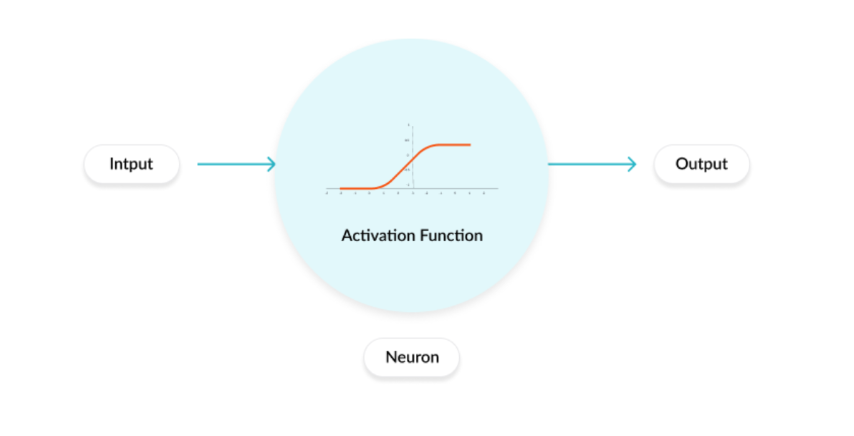

*Figure 3:* The figure shows an activation function applied on a neuron. It is taken from the blogpost: [Why Activation Functions?](https://medium.com/analytics-vidhya/why-activation-functions-8328f3f21120)

1. Rectified Linear Unit (ReLU)

- It takes the form: $\boxed{f(x) = max\{ 0, x\}}$.
- As shown in the figure below, [ReLU](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) outputs $x$, if $x$ is positive and $0$ otherwise. The range of ReLU is $[0, +\infty)$.
- One of the reasons it is commonly used is its sparsity: only few neurons will be activated and thereby making the activations sparse and efficient.
- It has become the default activation function for many types of neural networks because it makes the training of a model less expensive and the model often achieves better performance.
- A possible drawback of ReLU is the so-called _dying ReLU problem_ where neurons get stuck as inactive for all inputs, it is a form of [vanishing gradient problem](https://en.wikipedia.org/wiki/Vanishing_gradient_problem).

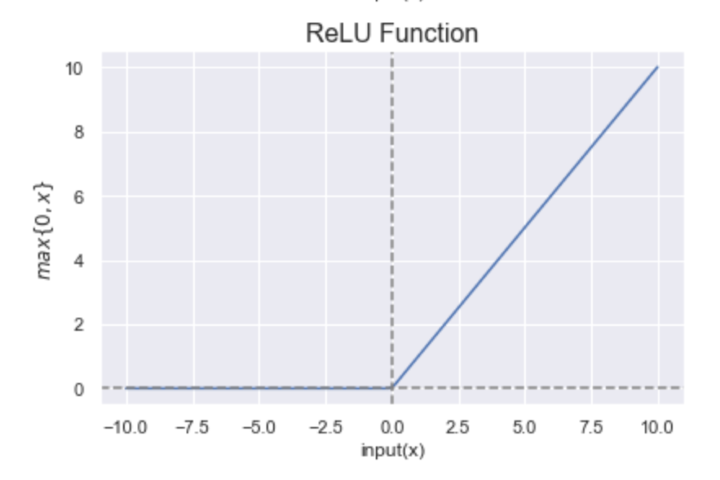

*Figure 4:* Representation of the *ReLU* function. Figure by Sakshi Misra.

2. Linear activation function

- A [linear activation function](https://keras.io/api/layers/core_layers/dense/) takes the form: $\boxed{a(x) = x}$.
- It is the most appropriate activation function for regression, since there is no constraint on the output.

3. Sigmoid activation function 

- $\sigma$: It takes the form: $\boxed{\sigma(x)=\frac{1}{1+e^{−x}}}.$
- It is the an appropriate activation function for the output layer for classification.

#### Loss function 


When training a neural network, the aim is to optimize the prediction error, i.e. the difference between the true value and the value predicted by the model. The prediction error can be written as a function, known as the objective function, cost function, or **loss function**. The goal is therefore to minimize the loss function, in other words, to find local minima. The loss function is one of the important components in training a neural network. For more details on loss functions, please refer to the blogpost: [Loss and Loss Functions for Training Deep Learning Neural Networks](https://machinelearningmastery.com/loss-and-loss-functions-for-training-deep-learning-neural-networks/).

Two commonly used loss functions in regression tasks are

1. the **Mean Squared Error (MSE)**: As the name suggests, this loss is calculated by taking the mean of the squared differences between the true and predicted values. 
2. the **Mean Absolute Error (MAE)**: The loss is calculated by taking the mean of the absolute difference between the true and predicted values.

A commonly used loss functions in binary classifications tasks is

1. the **Cross-Entropy**: also referred to as “cross-entropy,” “logarithmic loss,” “logistic loss,” or “log loss”. Each predicted probability is compared to the actual class output value (0 or 1) and a score is calculated that penalizes the probability based on the distance from the expected value. The penalty is logarithmic, offering a small score for small differences (0.1 or 0.2) and enormous score for a large difference (0.9 or 1.0). Cross-entropy loss is minimized, where smaller values represent a better model than larger values.


### Training a Neural Network

When starting with a neural network, the parameters, i.e. the weights and biases, are randomly initialized. The inputs are then fed into the network and produce an output. However, the corresponding output will most likely be very different from the true value. In other words, the prediction error will be very poor: the loss function is far from being minimal. Therefore, the initial parameters have to be optimized to obtain better predictions.

To this end, we need to minimize the loss function. An efficient way to find such a minimum is to use the [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent#:~:text=Gradient%20descent%20is%20a%20first,the%20direction%20of%20steepest%20descent.) algorithm. This optimization scheme is iterative and uses both the derivative of the loss function (or gradient in the multivariate case) and a learning rate. The main idea behind the algorithm is to follow the steepest direction of the function, obtained with the gradient and managing the length of each step with the learning rate. The latter is often referred to as a hyperparameter, which can be tuned using cross-validation (more details in future talktorials).

In training neural networks, it is very common to use _back-propagation_, which is a way of efficiently obtaining the gradients using the chain-rule for differentiation.

In summary, after each forward pass through a network, back-propagation performs a backward pass while adjusting the model’s parameters in order to minimize the loss function.

**Computation cost**

If the data set used is very large, computing the gradient of the loss function can be very expensive. A way to solve this issue is to use instead a sample, or mini-batch, of the training data at a time, known as [_Stochastic Gradient Descent (SGD)_](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) or _Mini-Batch Stochastic Gradient Descent_.

### Advantages and applications of neural networks

**Advantages of a neural network** 

- **Organic learning**: Neural networks have the ability to learn by extracting the important features present in the input data.
- **Non linear data processing**: They have the ability to learn and model non-linear and complex relationships. 
- **Time operation**: The computation cost during training time can be reduced using parallelization.

To learn more about advantages and disadvantages of a neural network, please refer to the article: J V Tu, "*Advantages and disadvantages of using artificial neural networks versus logistic regression for predicting medical outcomes*", [Journal of Clinical Epidemiology, **vol 49 issue 11**, pages: 1225-1231](https://pubmed.ncbi.nlm.nih.gov/8892489/).

* **Confusion Matrix**

A confusion matrix is a table used in machine learning to evaluate the performance of a classification model by comparing its predicted outcomes against the actual, true classes of a dataset. It visualizes where a model made correct predictions (on the diagonal) and where it made mistakes (off-diagonal), revealing patterns of confusion between classes. it is essential for understanding a model's strengths, weaknesses and calculating other key metrics (below). There is more infomation here https://en.wikipedia.org/wiki/Confusion_matrix 

| What the model predicts  | True active  |  True inactive |
|---|---|---|
| active  |  True Positive (TP) |  False Positive (FP) |
| inactive  |  False Negative (FN) |  True Negative (TN) |

#### Performance measures for Binary Classification

* **Per class metrics**

    * **Sensitivity**, also true positive rate
        * TPR = TP/(FN + TP) 
        * Recall of positive class
        * _Intuitively_: Out of all actual positives, how many were predicted as positive?
    * **Specificity**, also true negative rate
        * TNR = TN/(FP + TN)
        * Recall of negative class
        * _Intuitively_: Out of all actual negatives, how many were predicted as negative?
    * **Precision**
        * Precision = TP/(FP+FP)
        * _Intuitively_: Proportion of samples predicted to be positive.
    * **F1 Score**
        * F1 = 2 x ((Precision*Recall)/(Precision+Recall))
        * Harmonic mean of precision and recall
        * High F1 means both precision and recall are high 
    * **Suport**, the number of samples in each class.

* **Overall Metrics**

    * **Accuracy**
        * Accuracy = Correct predictions/Total predictions
        * Proportion of samples correctly classified
    * **Macro average**
        * Simple means of precision, recall, and F1-score across all classes. Each class is weighted equally: the size of the class is not taken into account, so all classes are given equal importance in calculating this set of averages.
    * **Macro average**
        * Weighted means of precision, recall, and F1-score. The averages are weighted by the support (number of true instances) for each class. This gives more influence to larger classes, to account for class are imbalance.

More information on averaged metrics is available in the scikit learn (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support).


* **ROC-curve**, receiver operating characteristic curve (https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics)
    * A graphical plot that illustrates the diagnostic ability of our classifier
    * Plots the sensitivity against the specificity
    * The closer the plot tends towards the top left the better
* **AUC**, the area under the ROC curve (AUC):  
    * Describes the probability that a classifier will rank a randomly chosen positive instance higher than a negative one
    * Values between 0 and 1, the higher the better
    * A value of 0.5 is equal to a random model.
 

* **Performance Measures Summary**

  | Metric         | What it tells you                         | Useful for                               |
  |----------------|-------------------------------------------|------------------------------------------|
  | **Precision**  | How many samples predicted to be in the class are actually members | Cases where it is   critical not to incorrectly assign samples to a class |
  | **Recall**     | How many of the true samples of the class were found | Cases where missing members of a class   is critical   |
  | **F1-score**   | Balance of precision and recall           | Summarising the reliability of predictions of a   class |
  | **Support**    | The size of each class                    | Understanding the balance of the dataset |
  | **Accuracy**   | Overall correctness of predictions        | Classes that are balanced in size        |
  | **Macro avg**  | Average metrics across classes (equal weight)     | Treating all classes as equally important  |
  | **Weighted avg** | Average metrics across classes (weighted by class size)       | Classes that are   imbalanced      |

We will investigate the performance of two Neural networks

1. Multi-layer Perceptron Classifier: For more information on MLP, see [sklearn MLPClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html).
2. TensorFlow/Keras: [Keras](https://keras.io/getting_started/) is an open-source library for neural networks. Its API runs on top of the very well-known [tensorflow](https://www.tensorflow.org/) deep learning platform.

### Importing Libraries
Before we start, let's make sure we have the necessary libraries ready for use.  Once again, we will be installing a few packages that are not included in the default packages.  Remember, for the installation commands to work they must each be in their own code cell.

In [10]:
# If you do not have scikit-learn installed, uncomment the following line
# !conda install -y -c conda-forge scikit-learn

In [11]:
from pathlib import Path
from warnings import filterwarnings
import time

# Silence some expected warnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import svm, metrics, clone
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import auc, accuracy_score, recall_score
from sklearn.metrics import (roc_curve, roc_auc_score, root_mean_squared_error,
                            mean_absolute_error,
                            mean_squared_error,
                            accuracy_score, 
                            classification_report, 
                            confusion_matrix,
                            ConfusionMatrixDisplay,
                            roc_auc_score)

import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit.Chem import MACCSkeys, rdFingerprintGenerator, Draw


### Load compound and activity data

Let's start by loading our data, which focuses on the Epidermal growth factor receptor (EGFR) kinase. The *csv* is loaded into a dataframe with the important columns:

* CHEMBL-ID
* SMILES string of the corresponding compound
* Measured affinity: pIC50

In [ ]:
# TO DO Change the data_path variable to the location of EGFR_compounds_lipinski.csv
# Read data from previous talktorials
chembl_df = pd.read_csv(r",index_col=0,)

# Look at head
print("Shape of dataframe : ", chembl_df.shape)
chembl_df.head()

In [ ]:
# TO DO Add "molecule_chembl_id", "smiles", "pIC50" in th ebrackets below
# Keep only the columns we want
chembl_df = chembl_df[[]]
chembl_df.head()

### Data preparation

#### Data labeling
We need to classify each compound as active or inactive. Therefore, we use the pIC50 value.

* pIC50 = -log10(IC50) 
* IC50 describes the amount of substance needed to inhibit, _in vitro_, a process by 50% .
* A common cut-off value for this biological data to discretize the pIC50 data is 6.3, which we will use for our experiment (refer to [<i>J. Med. Chem.</i> (2017), <b>60</b>, 474-485](https://doi.org/10.1021/acs.jmedchem.6b01611) and the corresponding
[notebook](https://github.com/Team-SKI/Publications/blob/master/Profiling_prediction_of_kinase_inhibitors/Build_ABL1_model.ipynb))
* Note that there are several other suggestions for an activity cut-off ranging from an pIC50 value of 5 to 7 in the literature or even to define an exclusion range when not to take data points. 

In [ ]:
# Add column for activity
chembl_df["active"] = np.zeros(len(chembl_df))

# Mark every molecule as active with an pIC50 of >= 6.3, 0 otherwise
chembl_df.loc[chembl_df[chembl_df.pIC50 >= 6.3].index, "active"] = 1.0

# CHECK_OUTPUT
# Check the distribution of class labels in the target column
# There is a class imbalance in the dataset, with more positive samples than negative samples
# The stratify parameter of train_test_split ensures that the class distribution is preserved in both
# the training and testing sets
print("Number of active compounds:", int(chembl_df.active.sum()))
print("Number of inactive compounds:", len(chembl_df) - int(chembl_df.active.sum()))

In [ ]:
# CHECK_OUTPUT
chembl_df.head()


#### Molecule encoding

Now we define a function `smiles_to_fp` to generate fingerprints from SMILES.
For now, we incorporated the choice between the following fingerprints:

* Maccs
* Morgan2 and Morgan3

In [16]:
def smiles_to_fp(smiles, method="morgan2", n_bits=2048):
    """
    Encode a molecule from a SMILES string into a fingerprint.

    Parameters
    ----------
    smiles : str
        The SMILES string defining the molecule.

    method : str
        The type of fingerprint to use. Default is MACCS keys.

    n_bits : int
        The length of the fingerprint.

    Returns
    -------
    array
        The fingerprint array.

    """

    # convert smiles to RDKit mol object
    mol = Chem.MolFromSmiles(smiles)

    if method == "maccs":
        return np.array(MACCSkeys.GenMACCSKeys(mol))
    if method == "morgan2":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    if method == "morgan3":
        fpg = rdFingerprintGenerator.GetMorganGenerator(radius=3, fpSize=n_bits)
        return np.array(fpg.GetFingerprint(mol))
    else:
        # NBVAL_CHECK_OUTPUT
        print(f"Warning: Wrong method specified: {method}. Default will be used instead.")
        return np.array(MACCSkeys.GenMACCSKeys(mol))

In [17]:
# Create a new dataframe to work with
compound_df=pd.DataFrame.copy(chembl_df)

In [ ]:
# TO DO Add in smiles_to_fp in the brackets below
# Add column for fingerprint
compound_df["fp"] = chembl_df["smiles"].apply()
# CHECK_OUTPUT
compound_df.head(3)


### Machine Learning (ML) ANN

In the following, we will try several ML approaches to classify our molecules. We will use:

* Artificial Neural Network (ANN) 

The goal is to test the ability of the model to predict data which it has never seen before in order to flag problems known as over fitting and to assess the generalization ability of the model.

We start by defining a function `model_training_and_validation` which fits a model on a random train-test split of the data and returns measures such as accuracy, sensitivity, specificity and AUC evaluated on the test set. We also plot the ROC curves using `plot_roc_curves_for_models`.


In [ ]:
# Create the features by dropping the target column
X_full = compound_df.drop(columns=["molecule_chembl_id","smiles","pIC50","active"]).fp.tolist()

# Create the target labels
y_full = compound_df["active"].tolist()


In [20]:
# Split the data into training (80%) and testing (20%) sets
# There is a class imbalance in the dataset, with more positive samples than negative samples
# The stratify parameter of train_test_split ensures that the class distribution is preserved in both
# the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

# Create a scaler
scaler = StandardScaler()

# TO DO Add in X_train in the brackets below
# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

In [ ]:
# TO DO add in 5,3 in the brackets below to specify the sizes of the hidden layers
# - Create a MLP Classifier model
mlpmodel = MLPClassifier(hidden_layer_sizes=(), random_state=42)
# - Fit the model to the training data and predict the test set
y_pred = mlpmodel.fit(X_train_scaled, y_train).predict(X_test_scaled)
# - Calculate the accuracy
accuracy = mlpmodel.score(X_test_scaled, y_test)
# - Print the accuracy of the model
accuracy

In [ ]:
# TO DO Add y_test, y_pred in the brackets below
# Create confusion matrices based on pure counts and normalised counts
cm = confusion_matrix(, )
print(cm)
cm_norm = confusion_matrix(, ,  normalize='true')
print(cm_norm)

In [ ]:
# Plot the confusion matrix
sns.reset_orig()
plt.rcParams["font.size"] = 14
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Create confusion matrix display objects for both the raw and normalised confusion matrices
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap="viridis", ax=axs[0])
clb = disp.im_.colorbar
clb.ax.set_title("Count")
disp.ax_.set_title("Confusion matrix (counts)")

disp = ConfusionMatrixDisplay(confusion_matrix=cm_norm)
disp.plot(cmap="viridis", ax=axs[1])
clb = disp.im_.colorbar
clb.ax.set_title("Count/support")
disp.ax_.set_title("Confusion matrix \n(normalised by support)")

plt.suptitle("Classification using MLP", fontsize=18)
plt.tight_layout()

plt.show()

The [`classification report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html) provides a set of metrics for classification tasks.

In [ ]:
print(classification_report(y_test, y_pred, target_names=["Active", "Inactive"]))

In [ ]:
#Calculate and display ROC curve and AUC-ROC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(mlpmodel, X_test, y_test)
plt.show()

The ANN model shows very good metrics and thus seem to be predictive.

### Keras workflow

[Keras](https://keras.io/getting_started/) is an open-source library for machine learning and more specifically neural networks. Its API runs on top of the very well-known [tensorflow](https://www.tensorflow.org/) deep learning platform.

Below, is a common workflow for training a neural network with [keras](https://keras.io/getting_started/).

 
- **Prepare the data** − Foremost for any machine learning algorithm, we process, filter and select only the required information from the data. Then, the data is split into training and test data sets. The test data is used to evaluate the prediction of the algorithm and to cross check the efficiency of the learning process.

 
- **Define the model** - In keras, every ANN is represented by keras [models](https://keras.io/api/models/model/#model-class). Keras provides a way to create a model which is called [sequential](https://keras.io/api/models/sequential/). The layers are arranged sequentially where the data flows from one layer to another layer in a given order until the data finally reaches the output layer. Each layer in the ANN can be represented by a *keras layer*. 


- **Compile the model** − The compilation is the final step in creating a model. Once the compilation is done, we can move on to the training phase. A _loss function_ and an _optimizer_ are required in the learning phase to define the prediction error and to minimize it, respectively. In the practical part of this talktorial, we use the mean squared error as a loss and the [adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/) optimizer, which is a popular version of gradient descent and has shown to give good results in a wide range of problems.

- **Fit the model** - The actual learning process will be done in this phase using the training data set. We can call the [fit()](https://keras.io/api/models/model_training_apis/#fit-method) method which needs several parameters such as $x$ the input data, $y$ the target data, the batch size, the number of epochs, etc. An _epoch_ is when the entire dataset is passed forward and backward through the neural network once.

- **Evaluate model** − We can evaluate the model by looking at the loss function between the predicted and true values of the test data using the [evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) method.
    
- **Predictions on external/unlabeled data** − We make predictions based on the trained model for the external data set using the [predict()](https://keras.io/api/models/model_training_apis/#predict-method) method.

In [ ]:
# If you do not have tensorflow installed, uncomment the following line
# !pip install tensorflow

In [27]:
# Neural network specific libraries
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

%matplotlib inline

In [ ]:
# Check data frame
compound_df.head(3)

### Define neural network

A keras model is defined by specifying the number of neurons in the hidden layers and the activation function as arguments. For our purpose, we define a model with *two hidden layers*. We use ReLU in the hidden layers and a sigmoid function on the output layer, since the aim is to predict a classification.

Finally, we compile the model using the *Binary Cross Entropy* as a loss argument and *adam* as an optimizer.

In [28]:
def neural_network_model(hidden1, hidden2):
    """
    Creating a neural network from two hidden layers
    using ReLU as activation function in the two hidden layers
    and a linear activation in the output layer.

    Parameters
    ----------
    hidden1 : int
        Number of neurons in first hidden layer.

    hidden2: int
        Number of neurons in second hidden layer.

    Returns
    -------
    model
        Fully connected neural network model with two hidden layers.
    """

    model = Sequential()
    # First hidden layer
    model.add(Dense(hidden1, activation="relu", name="layer1"))
    # Second hidden layer
    model.add(Dense(hidden2, activation="relu", name="layer2"))
    # Output layer
    model.add(Dense(1, activation="sigmoid", name="layer3"))

    # Compile model
    model.compile(loss="BinaryCrossentropy", optimizer="adam", metrics=["auc"])
    return model

In [46]:
# Split the data into training (80%), validation () (for hyperparameter tuningin) and testing (20%) sets

X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42, stratify=y_full)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2) 

# Create a scaler
scaler = StandardScaler()

# TO DO Add in X_train in the brackets below
# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the training data
X_val_scaled = scaler.transform(X_val)

# Transform the testing data
X_test_scaled = scaler.transform(X_test)

len(X_train), len(X_val), len(X_test)

(2966, 742, 927)

### Train the model

We try different mini-batch sizes and plot the respective losses.

In [ ]:
# TO DO Add in 50 for the nb_epoch variable and 64 for layer1_size
# Neural network parameters
batch_sizes = [16, 32, 64]
nb_epoch = 
layer1_size = 
layer2_size = 32

In [ ]:
# Plot
fig = plt.figure(figsize=(12, 6))
sns.set(color_codes=True)
for index, batch in enumerate(batch_sizes):
    fig.add_subplot(1, len(batch_sizes), index + 1)
    model = neural_network_model(layer1_size, layer2_size)

    # Fit model on static_train_x, static_train_y data
    history = model.fit(
        np.array(list((X_train_scaled))).astype(float),
        pd.DataFrame(y_train),
        batch_size=batch,
        validation_data=(np.array(list((X_val_scaled))).astype(float), pd.DataFrame(y_val)),
        verbose=1,
        epochs=nb_epoch,
    )
    plt.plot(history.history["loss"], label="train")
    plt.plot(history.history["val_loss"], label="test")
    plt.legend(["train", "test"], loc="upper right")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.ylim((0, 15))
    plt.title(
        f"test loss = {history.history['val_loss'][nb_epoch-1]:.2f}, " f"batch size = {batch}"
    )
plt.show()

From the loss plots above, which bacth size seems to give the best performance.

A [_ModelCheckpoint callback_](https://keras.io/api/callbacks/) is used to save the best model/weights (in a checkpoint file) at some interval, so the model/weights can either be saved as it or be loaded later to continue the training from the state saved.

Now, we train the model with a batch size of 64 (because as seen from the figure above, it has the lowest test loss) and we save the weights that give the best perfomance in the file `best_keras.weights.h5`.

In [ ]:
# Save the trained model
filepath = r"best.keras.weights.h5"
checkpoint = ModelCheckpoint(
    str(filepath),
    monitor="loss",
    verbose=1,
    save_best_only=True,
    mode="min",
    save_weights_only=True,
)
callbacks_list = [checkpoint]

# TO DO Add in the best batch_size below 
# Fit the model
model.fit(
    np.array(list((X_train_scaled))).astype(float),
    pd.DataFrame(y_train),
    epochs=nb_epoch,
    batch_size=,
    callbacks=callbacks_list,
    verbose=1,
)

### Evaluation & prediction on test set

The [evaluate()](https://keras.io/api/models/model_training_apis/#evaluate-method) method is used to check the performance of our model. It reports the **loss**  and AUC. 

In [ ]:
# Evalute the model
print(f"Evaluate the model on the train data")
scores = model.evaluate(np.array(list((X_train_scaled))).astype(float), pd.DataFrame(y_train), verbose=1)
print(f" loss: {scores[0]:.2f}")
print(f" auc: {scores[1]:.2f}")


print(f"Evaluate the model on the test data")
scores = model.evaluate(np.array(list((X_test_scaled))).astype(float), pd.DataFrame(y_test), verbose=1)
print(f" loss: {scores[0]:.2f}")
print(f" auc: {scores[1]:.2f}")


The loss on the training set is very low (which may indicate overfitting) whilst the loss test set is as below 1 which seems good.


### Prediction on external/unlabeled data

We use the trained neural network to predict the activity of unlabeled compounds from the `test.csv`file.

In [ ]:
# TO DO Change the data_path variable to the location of test.csv
# Load external/unlabeled data set
external_data = pd.read_csv(r"", index_col=0)
external_data = external_data.reset_index(drop=True)
external_data.head()


We use the same `smiles_to_fp` function and convert the SMILES strings into fingerprints.

In [ ]:
# Convert SMILES strings to MACCS fingerprints
external_data["fingerprints_df"] = external_data["canonical_smiles"].apply(smiles_to_fp)

# Look at head
print("Shape of dataframe : ", external_data.shape)
external_data.head(3)


In [ ]:
# Prediction on external/unlabeled data
predictions = model.predict(    np.array(list((external_data["fingerprints_df"]))).astype(float), callbacks=callbacks_list)

#predicted_activity variable can be between 0-1 with higher meaning the precition has higher probability of being active
predicted_activity = pd.DataFrame(predictions, columns=["predicted_activity"])

# Join the predcitions to the external_data dataframe
predicted_df = external_data.join(predicted_activity)

predicted_df.head(3)

In [37]:
# Save the predicted values in a csv file in the data folder
predicted_df.to_csv(r"predicted_activity_df.csv")

#### Select the top 3 compounds

We select the 3 compounds with the highest predicted pIC50 values, which could be further investigated as potential EGRF inhibitors.

In [38]:
# Select top 3 drugs
predicted_activity_df = pd.read_csv(r"predicted_activity_df.csv", index_col=0)
top3_drug = predicted_activity_df.nlargest(4, "predicted_activity")
top3_drug

,canonical_smiles,fingerprints_df,predicted_activity
18,Clc1c(F)ccc(NC=2N=CNC=3C=2C=C(OCCCCC=C=C)C(=O)...,[0 0 0 ... 0 0 0],0.999985
9,Brc1cc(Nc2ncnc3nc(NC)ccc23)ccc1,[0 0 0 ... 0 0 0],0.999980
27,S(=O)([O-])(=Nc1sccn1)c1ccc(Nc2ncnc3c2cc(NC(=O...,[0 0 0 ... 0 0 0],0.999962
33,Clc1c(F)ccc(Nc2nc(N)nc3[nH]c(CCc4ccccc4)cc23)c1,[0 0 0 ... 0 0 0],0.999464


In [ ]:
# Draw the drug molecules
mols_EGFR = [Chem.MolFromSmiles(smile) for smile in top3_drug["canonical_smiles"]]
activity_EGFR = top3_drug["predicted_activity"].tolist()
activity_values = [(f"probability of being active: {value:.2f}") for value in pIC50_EGFR]

Draw.MolsToGridImage(mols_EGFR, molsPerRow=3, subImgSize=(450, 300), legends=activity_values)

## Discussion





From above we can see that there are some similarities between the three molecules. For example, they contain an aniline and pyrimidine group, as well as several aromatic carbon rings.

Since the external/unlabeled data is also taken from ChEMBL, we can double check if our predictions make sense. For example, one of these compound with SMILES `Brc1cc(Nc2ncnc3nc(NC)ccc23)ccc1` and predicted to be active. It has a high tested affinity against EGFR: a pIC50 value of 7.28, see entry [CHEMBL298637](https://www.ebi.ac.uk/chembl/compound_report_card/CHEMBL298637/).

Using the neural network for predictive modeling has some advantages: it is not as time consuming as laboratory experiments and it is much cheaper. It also hints at the kind of molecules that could be further investigated as potential EGFR inhibitors. 

However, this model has some disadvantages: it highly depends on the chemical space of the training data, the parameter tuning as well as variable initialization which might affect the final results.
Such a model neither provides information about the side effects of compounds nor their potential toxicity.

## Points to consider

- We successfully trained ANN models. 
- What other hyperparameters can be tuned to get better performance results?
- What other activation functions and metrics can be used while defining the model?
- Can you think of any other visualization method to plot the predictions and observed values?

* Which model performed best on our data set and why?
    * the model performs (very) well on our dataset.  
    * Additionally, it is always advisable to have another external validation set for model evaluation.  
* Would changing the fingerprint alter performance?
    * Obviously, MACCS was good to start training and validating models to see if a classification is possible. 
    * However, MACCS keys are rather short (166 bit) compared to others (2048 bit), as for example Morgan fingerprint. 
    
### Where could we go from here?

* The next step could be to use these models to do a classification with an unknown screening dataset to predict novel potential EGFR inhibitors.
* An example for a large screening data set is e.g. [MolPort](https://www.molport.com/shop/database-download) with over 7 million compounds (it isn't recommended to try this right now).